# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **San Diego, California, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **San Diego, California, United States** to Ann Arbor, USA. In that case at least one source file must be about **San Diego, California, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **San Diego, California, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from urllib.request import urlopen
from datetime import datetime, timedelta
%matplotlib notebook

baseurl = {'San Diego':"https://www.almanac.com/weather/history/CA/San%20Diego/",
           'Ann Arbor':"https://www.almanac.com/weather/history/MI/Ann%20Arbor/"}

start=datetime.strptime("2018-01-01", "%Y-%m-%d")
end=datetime.strptime("2018-01-14", "%Y-%m-%d")

df=pd.read_csv('A4_weather.csv',header=0)
print('read file')
last=len(df)
start=datetime.strptime(df['date'][last-1], "%Y-%m-%d")+timedelta(days=1)
end=start+timedelta(days=14)

def get_dates(s, e):
    start = s
    end = e
    date_generated = [start + timedelta(days=x) for x in range(0, (end-start).days+1)]
    return date_generated

def scrape_data(url):
    f = urlopen(url)
    myfile = f.read()

    #page = urllib2.urlopen(url).read()
    soup = BeautifulSoup(myfile,"lxml")

    #trs=soup.find_all('tr')
    #for tr in soup.find_all('tr'):
        #print(tr.text)
        #tds = tr.find_all('td')
        #print(tds[0].text)
    #print('\n\n')    
    td = soup.find_all('td')

    min_temp=td[2].text[:-3]
    mean_temp=td[3].text[:-3]
    max_temp=td[4].text[:-3]
    press=td[5].text[:-3]
    dew=td[6].text[:-3]
    rain=td[7].text[:-3]
    visibility=td[8].text[:-3]
    mean_wind=td[10].text[:-3]
    max_wind=td[11].text[:-3]
    
    res=[min_temp,mean_temp,max_temp,press,dew,rain,visibility,mean_wind,max_wind]
    return res

datelist=get_dates(start,end)
for city, cityurl in baseurl.items():
    count=0
    for date in datelist:
        datestr=date.strftime("%Y-%m-%d")
        url_city_date=cityurl+datestr
        res_list=scrape_data(url_city_date)
        res_list.insert(0,str(datestr))
        res_list.insert(1,city)
        df.loc[len(df)] = res_list
        count=count+1
        print(city, count, datestr)
df.to_csv('A4_weather.csv', index=False)
print('data saved')

read file
San Diego 1 2018-12-27
San Diego 2 2018-12-28
San Diego 3 2018-12-29
San Diego 4 2018-12-30
San Diego 5 2018-12-31
San Diego 6 2019-01-01
Ann Arbor 1 2018-12-27
Ann Arbor 2 2018-12-28
Ann Arbor 3 2018-12-29
Ann Arbor 4 2018-12-30
Ann Arbor 5 2018-12-31
Ann Arbor 6 2019-01-01
data saved


In [135]:
df=pd.read_csv('A4_weather.csv')
df.head()


,date,city,min_temp,mean_temp,max_temp,press,dew,rain,visibility,mean_wind,max_wind
0,2018-01-01,San Diego,50.0,56.8,66.0,30.13,52.6,0.0,4.5,4.14,11.39
1,2018-01-02,San Diego,51.1,60.4,71.1,30.13,54.0,0.0,6.7,4.03,8.06
2,2018-01-03,San Diego,54.0,61.5,72.0,30.06,53.6,0.0,5.8,2.19,8.06
3,2018-01-04,San Diego,54.0,61.9,70.0,30.10,54.4,0.0,5.8,3.57,10.24
4,2018-01-05,San Diego,54.0,63.3,73.0,30.16,48.9,0.0,9.7,3.91,10.24


In [139]:
df['date']=pd.to_datetime(df['date'])
df1=df.copy()


In [159]:
a=df1.groupby('city')
sd=a.get_group('San Diego').set_index('date')
col_name=list(sd.columns)
new_col=[]
for l in col_name:
    new_col.append(l+'(SD)')
sd.columns=new_col
sd.head()

,city(SD),min_temp(SD),mean_temp(SD),max_temp(SD),press(SD),dew(SD),rain(SD),visibility(SD),mean_wind(SD),max_wind(SD)
date,,,,,,,,,,
2018-01-01,San Diego,50.0,56.8,66.0,30.13,52.6,0.0,4.5,4.14,11.39
2018-01-02,San Diego,51.1,60.4,71.1,30.13,54.0,0.0,6.7,4.03,8.06
2018-01-03,San Diego,54.0,61.5,72.0,30.06,53.6,0.0,5.8,2.19,8.06
2018-01-04,San Diego,54.0,61.9,70.0,30.10,54.4,0.0,5.8,3.57,10.24
2018-01-05,San Diego,54.0,63.3,73.0,30.16,48.9,0.0,9.7,3.91,10.24


In [277]:
aa=a.get_group('Ann Arbor').set_index('date')
aa['temp_swing']=aa['max_temp']-aa['min_temp']
col_name=list(aa.columns)
new_col=[]
for l in col_name:
    new_col.append(l+'(AA)')
aa.columns=new_col
aa.head()

,city(AA),min_temp(AA),mean_temp(AA),max_temp(AA),press(AA),dew(AA),rain(AA),visibility(AA),mean_wind(AA),max_wind(AA),rain1(AA),temp_swing(AA)
date,,,,,,,,,,,,
2018-01-01,Ann Arbor,-11.9,4.4,15.1,30.54,-2.7,0.0,9.4,7.83,17.26,NaN,27.0
2018-01-02,Ann Arbor,5.0,9.2,12.9,30.50,1.6,0.0,9.5,9.67,12.77,NaN,7.9
2018-01-03,Ann Arbor,0.0,5.9,15.8,30.16,-1.4,0.0,7.6,10.01,14.96,NaN,15.8
2018-01-04,Ann Arbor,0.0,10.8,16.0,30.12,2.5,0.0,9.2,10.70,19.68,NaN,16.0
2018-01-05,Ann Arbor,-8.0,1.0,16.0,30.28,-9.7,0.0,10.0,9.44,16.11,NaN,24.0


In [187]:
full=pd.merge(ah,sd,on='date')
full.shape

(365, 21)

<IPython.core.display.Javascript object>


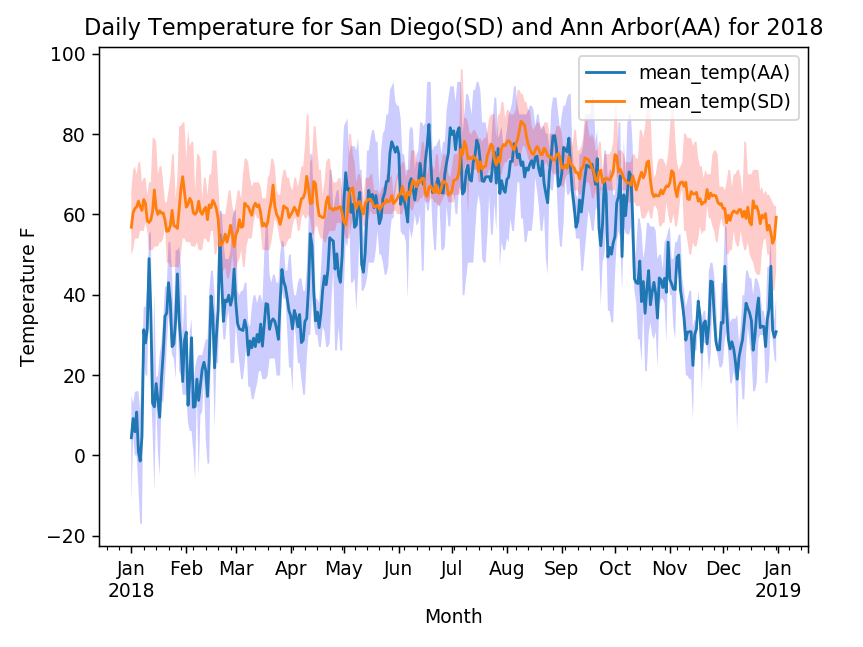

In [220]:
full.plot(None,['mean_temp(AA)','mean_temp(SD)'])
plt.gca().fill_between(full.index,full['min_temp(AA)'],full['max_temp(AA)'],facecolor = "blue",alpha = 0.2)
plt.gca().fill_between(full.index,full['min_temp(SD)'],full['max_temp(SD)'],facecolor = "red",alpha = 0.2)
plt.xlabel('Month')
plt.ylabel('Temperature F')
plt.title('Daily Temperature for San Diego(SD) and Ann Arbor(AA) for 2018')
plt.tight_layout()
plt.savefig('A4_1.png')
plt.show()

In [211]:
import seaborn as sns

In [247]:
#plt.figure(2)

#box_plot_data=[value1,value2,value3,value4]
#plt.boxplot(box_plot_data)
#plt.show()
#rain_aa=aa[]

aa.head()

#aa['rain(AA)']>0
#rain_aa
"""
sns.violinplot('city', 'mean_temp', data=df1)
plt.title('Box plot of daily average temperature for 2018')
plt.savefig('A4_2.png')
plt.show()
"""

"\nsns.violinplot('city', 'mean_temp', data=df1)\nplt.title('Box plot of daily average temperature for 2018')\nplt.savefig('A4_2.png')\nplt.show()\n"

<IPython.core.display.Javascript object>


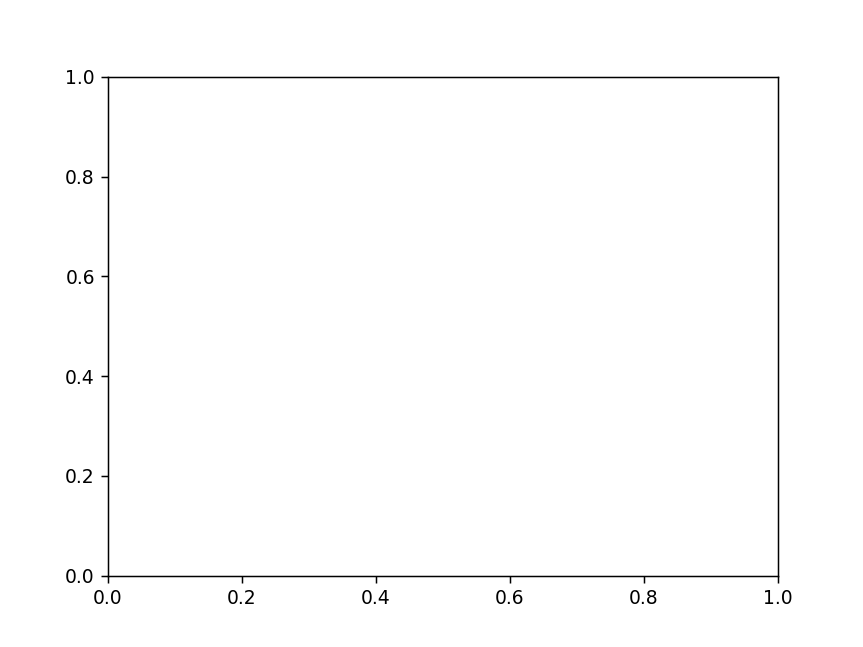

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [296]:
#box_plot_data=pd.DataFrame({'Ann Arbor':list(rain_aa), 'San Diego':list(rain_sd)}).reset_index(drop=True)
#box_plot_data.shape
plt.figure(9)
plt.boxplot(rain_aa,rain_sd)


In [290]:
list(rain_aa)

[0.01,
 0.01,
 0.09,
 0.16,
 0.18,
 0.22,
 0.02,
 0.01,
 0.05,
 0.02,
 0.09,
 0.05,
 0.05,
 0.02,
 0.08,
 0.39,
 0.11,
 0.13,
 0.05,
 0.01,
 1.36,
 0.81,
 0.11,
 0.11,
 0.05,
 0.03,
 0.02,
 1.39,
 0.25,
 0.01,
 0.04,
 0.2,
 0.24,
 0.1,
 0.26,
 0.1,
 0.77,
 0.02,
 0.11,
 0.06,
 0.3,
 0.78,
 0.54,
 0.01,
 0.03,
 0.01,
 0.09,
 0.02,
 0.17,
 0.15,
 0.88,
 0.42,
 0.05,
 0.25,
 0.02,
 1.54,
 0.68,
 0.02,
 0.69,
 0.01,
 0.33,
 0.05,
 0.43,
 0.04,
 0.49,
 0.12,
 0.06,
 0.22,
 0.26,
 0.37,
 0.02,
 0.09,
 0.16,
 0.11,
 0.01,
 0.04,
 0.31,
 1.56,
 0.03,
 0.78,
 0.1,
 0.14,
 0.43,
 0.04,
 0.05,
 0.05,
 0.21,
 0.08,
 0.27,
 0.86,
 0.05,
 0.07,
 0.13,
 0.01,
 0.57,
 0.04,
 0.06,
 0.08,
 0.39,
 0.14,
 1.19,
 0.21,
 0.22,
 0.06,
 0.02,
 0.12,
 0.08,
 0.19,
 0.04,
 0.05,
 0.24,
 0.04,
 0.32,
 0.1,
 0.06,
 0.03,
 0.35,
 0.21,
 0.15,
 0.01,
 0.05]

<IPython.core.display.Javascript object>


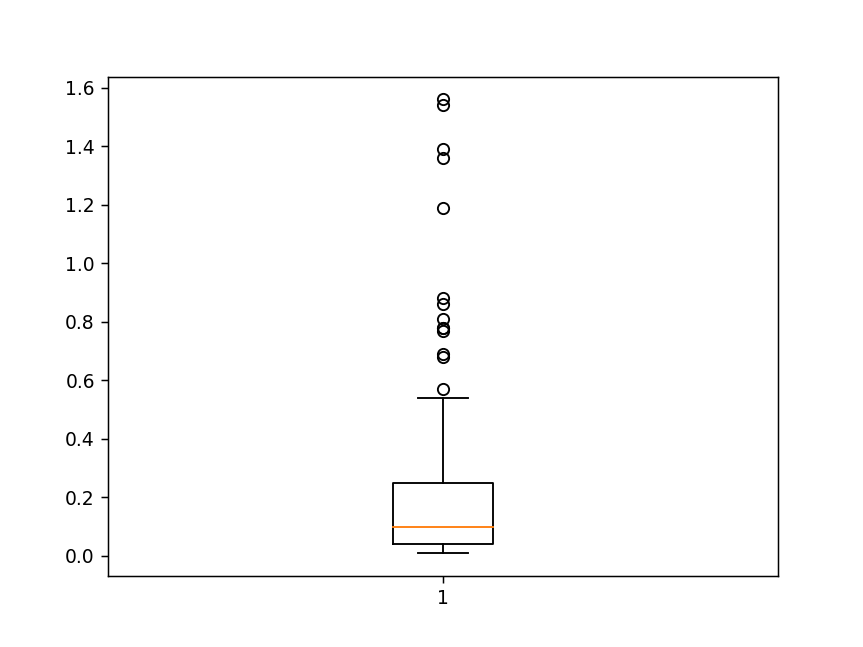

C:\Users\dwang\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\dwang\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\dwang\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\dwang\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\dwang\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

In [281]:
plt.figure(7)
sns.kdeplot(aa['rain1'])
sns.kdeplot(sd['rain1'])

<IPython.core.display.Javascript object>


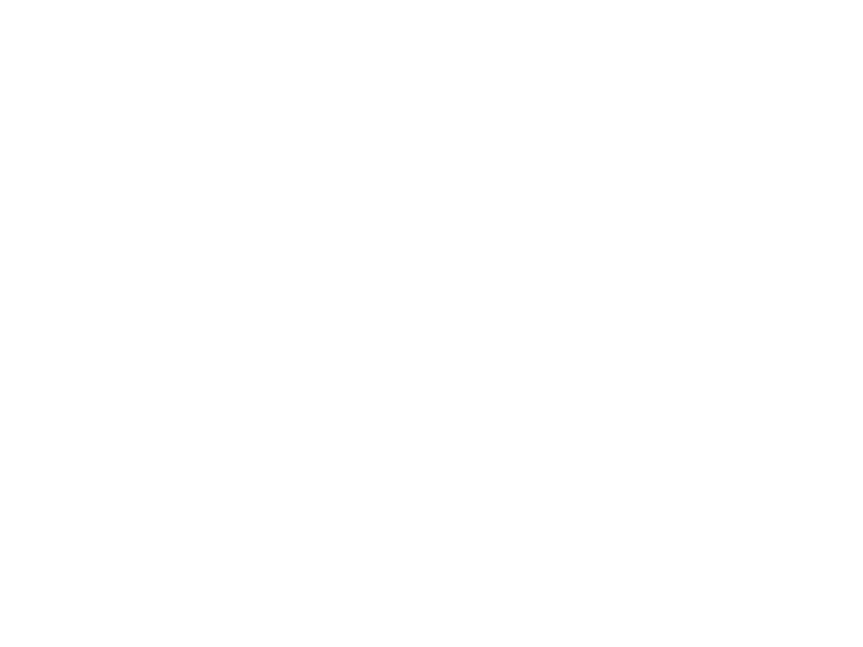

<IPython.core.display.Javascript object>


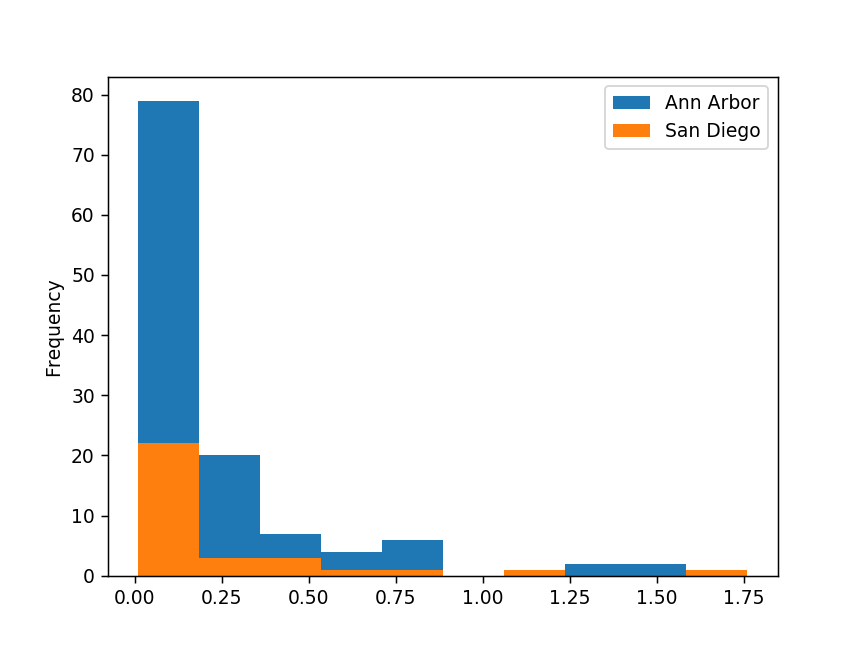

In [258]:
rain_aa=aa[aa['rain(AA)']>0]['rain(AA)']
rain_aa
rain_sd=sd[sd['rain(SD)']>0]['rain(SD)']
rain_sd
box_plot_data=pd.DataFrame({'Ann Arbor':rain_aa, 'San Diego':rain_sd})
plt.figure(5)
box_plot_data.plot.hist()
plt.show()


<IPython.core.display.Javascript object>


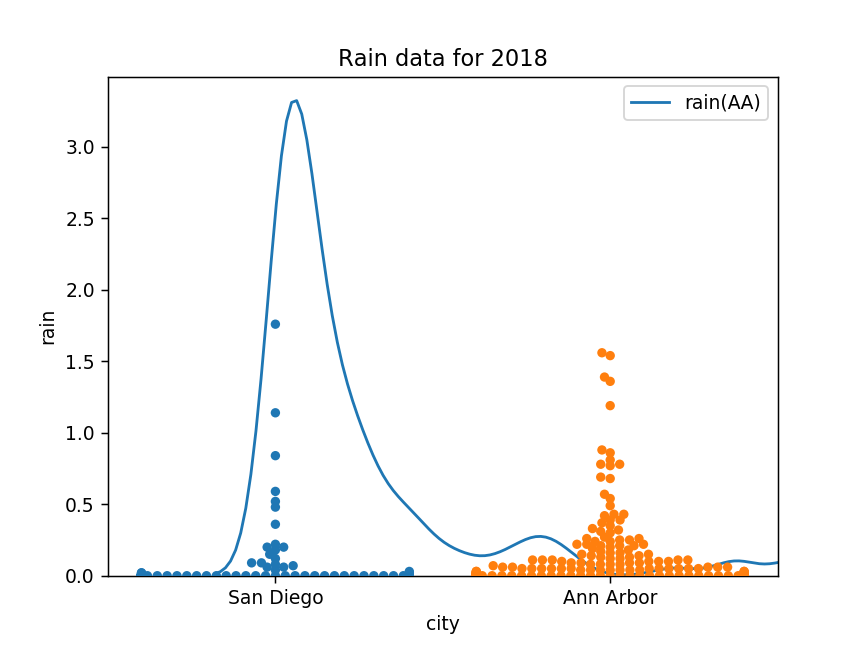

In [267]:
plt.figure(4)
sns.swarmplot('city', 'rain', data=df1);
plt.title('Rain data for 2018')
#plt.savefig('A4_3.png')
plt.show()

In [280]:
for n in sd['rain(SD)']:
    if n>0:
        sd['rain1']=sd['rain(SD)']
        print(n)
    else:
        sd['rain1']=np.nan
#df1['rain1']

1.14
0.59
0.02
0.01
0.02
0.04
0.2
0.12
0.09
0.15
0.01
0.36
0.01
0.06
0.01
0.07
0.2
0.01
0.01
0.08
0.03
0.01
0.02
0.09
0.48
0.01
0.22
0.52
0.06
0.84
1.76
0.18


In [122]:
df.to_csv('A4_weather.csv', index=False)

In [ ]:
# run this to start a new DF, otherwise read from the csv file

#df = pd.DataFrame(columns=['date','city','min_temp','mean_temp','max_temp','press','dew','rain','visibility','mean_wind','max_wind'])
#df = df.astype({"date": str})


In [ ]:
#Extra

from urllib.request import urlopen

link = "https://www.almanac.com/weather/history/CA/San%20Diego/2015-02-17"
#https://www.almanac.com/weather/history/MI/Ann%20Arbor/2015-02-17
f = urlopen(link)
myfile = f.read()
print(myfile)
#https://www.almanac.com/weather/history/CA/San%20Diego/2015-02-17